<a href="https://www.kaggle.com/code/deepbodkhe/mcdonald-segmentation?scriptVersionId=218059024" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

In [2]:
mcdonalds = pd.read_csv("/kaggle/input/mcdonald-csv-file/mcdonalds.csv")

In [3]:
print(f"Columns in dataframe: {mcdonalds.columns}")
print(f"Shape of dataframe: {mcdonalds.shape}")
print(mcdonalds.head(3))

Columns in dataframe: Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
Shape of dataframe: (1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [4]:
# Step 6: Profiling Segments
# Data Preprocessing
MD_x = mcdonalds.iloc[:, :11]
MD_x = (MD_x == "Yes").astype(int)  # Convert categorical responses to binary

In [5]:
# Normalize the data for PCA
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)


In [6]:
pca = PCA(n_components=2)
MD_x_pca = pca.fit_transform(MD_x_scaled)

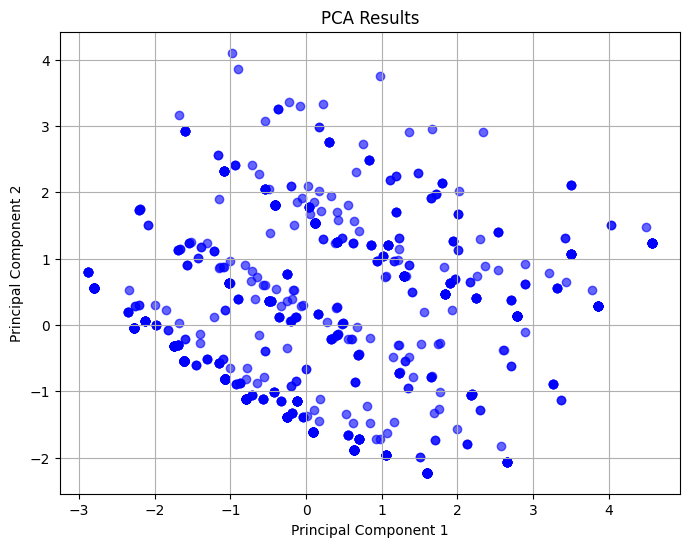

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(MD_x_pca[:, 0], MD_x_pca[:, 1], alpha=0.6, color='b')
plt.title("PCA Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [8]:
# Perform K-means clustering
inertia = []
silhouette_scores = []
range_clusters = range(2, 9)

In [9]:
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)
    kmeans.fit(MD_x_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(MD_x_scaled, kmeans.labels_))

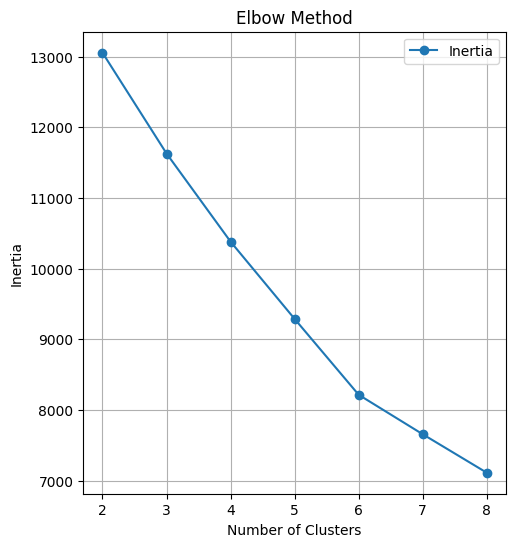

In [10]:
# Plot inertia (Elbow Method) and Silhouette Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range_clusters, inertia, marker='o', label='Inertia')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.legend()


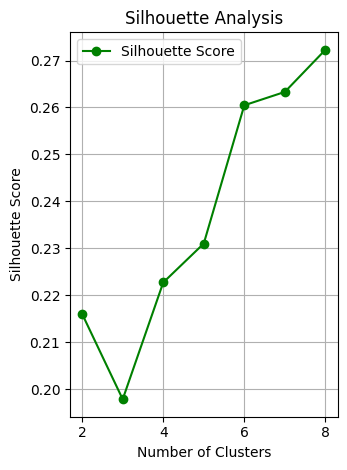

In [11]:
plt.subplot(1, 2, 2)
plt.plot(range_clusters, silhouette_scores, marker='o', label='Silhouette Score', color='g')
plt.title("Silhouette Analysis")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=1234, n_init=10)
kmeans.fit(MD_x_scaled)
cluster_labels = kmeans.labels_

In [13]:
mcdonalds['Cluster'] = cluster_labels

In [14]:
# Selecting the Target Segment
# Profiling clusters
numeric_columns = mcdonalds.select_dtypes(include=['number']).columns
cluster_profile = mcdonalds.groupby('Cluster')[numeric_columns].mean()
print("Cluster Profiles:")
print(cluster_profile)


Cluster Profiles:
               Age  Cluster
Cluster                    
0        48.394572      0.0
1        40.692529      1.0
2        43.880192      2.0


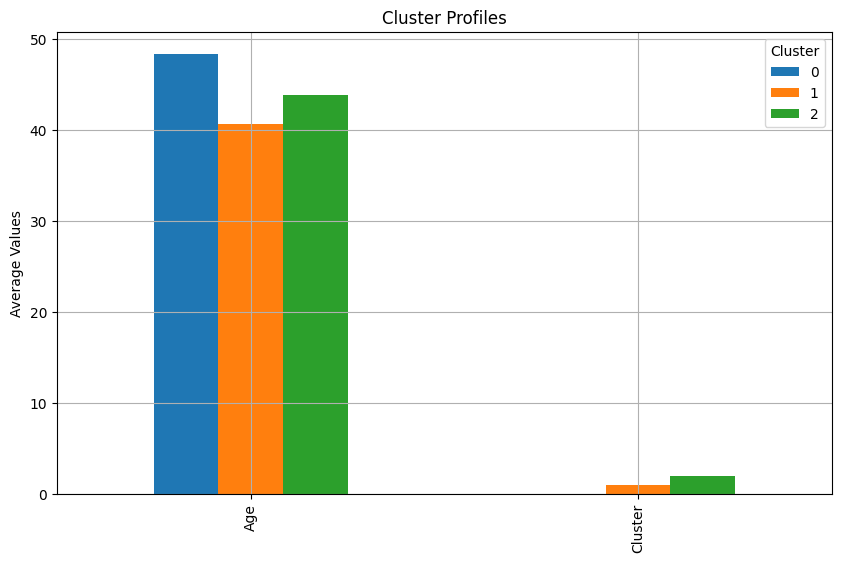

In [15]:
cluster_profile.T.plot(kind='bar', figsize=(10, 6))
plt.title("Cluster Profiles")
plt.ylabel("Average Values")
plt.grid(True)
plt.show()

In [16]:
#  Customizing the Marketing Mix
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}: Recommendations")
    
    cluster_data = cluster_profile.iloc[cluster]
    
    products_to_focus = cluster_data[cluster_data > 0.5].index
    less_popular_items = cluster_data[cluster_data <= 0.5].index
    
    print("- Products to focus on:", list(products_to_focus))
    print("- Less popular items:", list(less_popular_items))




Cluster 0: Recommendations
- Products to focus on: ['Age']
- Less popular items: ['Cluster']

Cluster 1: Recommendations
- Products to focus on: ['Age', 'Cluster']
- Less popular items: []

Cluster 2: Recommendations
- Products to focus on: ['Age', 'Cluster']
- Less popular items: []


In [17]:
output_path = "/kaggle/working/mcdonalds_with_clusters.csv"
mcdonalds.to_csv(output_path, index=False)
print(f"Clustered dataset saved to: {output_path}")

Clustered dataset saved to: /kaggle/working/mcdonalds_with_clusters.csv
